In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shaunthesheep/microsoft-catsvsdogs-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\nisar\.cache\kagglehub\datasets\shaunthesheep\microsoft-catsvsdogs-dataset\versions\1


In [2]:
import os
import numpy as np
import joblib
import matplotlib.pyplot as plt
from PIL import Image, UnidentifiedImageError
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [3]:
dataset_path = r"C:\Users\nisar\.cache\kagglehub\datasets\shaunthesheep\microsoft-catsvsdogs-dataset\versions\1\PetImages"

data = []
labels = []
IMG_SIZE = 64

for category in ["Cat", "Dog"]:
    folder_path = os.path.join(dataset_path, category)
    for img_name in os.listdir(folder_path):
        try:
            if img_name.lower() == "thumbs.db":
                continue           
            img_path = os.path.join(folder_path, img_name)
            try:
                img = Image.open(img_path).convert('L')
                img = img.resize((IMG_SIZE, IMG_SIZE))
                img_array = np.array(img).flatten()
                data.append(img_array)
                labels.append(category)
            except (UnidentifiedImageError, IOError) as e:
                print(f"Skipping invalid image {img_name}: {e}")
        except Exception as e:
            print(f"Error processing image {img_name}: {e}")

data = np.array(data)
labels = np.array(labels)

print(f"Data shape: {data.shape}")
print(f"Labels shape: {labels.shape}")

Skipping invalid image 666.jpg: cannot identify image file 'C:\\Users\\nisar\\.cache\\kagglehub\\datasets\\shaunthesheep\\microsoft-catsvsdogs-dataset\\versions\\1\\PetImages\\Cat\\666.jpg'
Skipping invalid image 11702.jpg: cannot identify image file 'C:\\Users\\nisar\\.cache\\kagglehub\\datasets\\shaunthesheep\\microsoft-catsvsdogs-dataset\\versions\\1\\PetImages\\Dog\\11702.jpg'


C:\Users\nisar\AppData\Roaming\Python\Python311\site-packages\PIL\TiffImagePlugin.py:870: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Data shape: (24998, 4096)
Labels shape: (24998,)


In [4]:
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)
X_train, X_test, y_train, y_test = train_test_split(data, labels_encoded, test_size=0.2, random_state=42)
print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

Training set size: 19998
Testing set size: 5000


In [5]:
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)
print("SVM model training complete.")

SVM model training complete.


In [6]:
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Accuracy: 65.74%
Classification Report:
              precision    recall  f1-score   support

         Cat       0.67      0.64      0.65      2515
         Dog       0.65      0.68      0.66      2485

    accuracy                           0.66      5000
   macro avg       0.66      0.66      0.66      5000
weighted avg       0.66      0.66      0.66      5000



In [7]:

joblib.dump(svm_model, "svm_cats_vs_dogs_model.pkl")
print("Model saved as 'svm_cats_vs_dogs_model.pkl'.")
loaded_model = joblib.load("svm_cats_vs_dogs_model.pkl")
print("Model loaded successfully.")

Model saved as 'svm_cats_vs_dogs_model.pkl'.
Model loaded successfully.


In [8]:

def display_image_prediction(image_path, prediction, true_label):
    img = Image.open(image_path).convert('L')
    img = img.resize((IMG_SIZE, IMG_SIZE))
    plt.imshow(img, cmap='gray')
    plt.title(f"Prediction: {label_encoder.inverse_transform([prediction])[0]}, True Label: {label_encoder.inverse_transform([true_label])[0]}")
    plt.axis('off')
    plt.show()

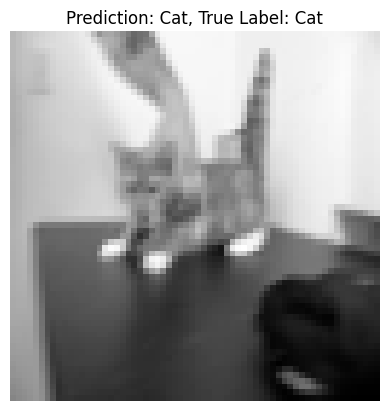

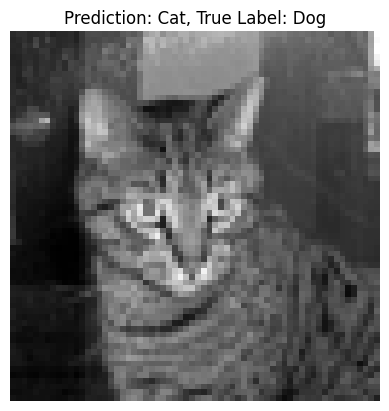

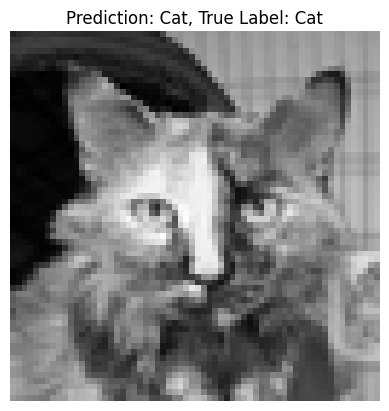

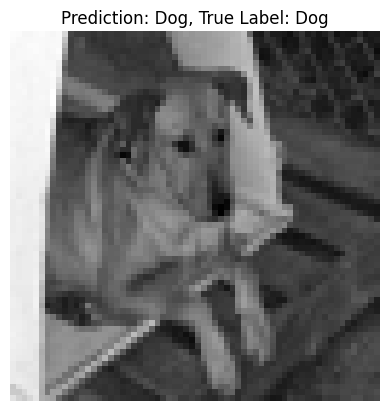

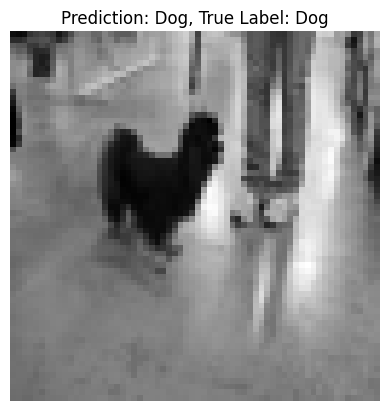

In [9]:
for i in range(5): 
    img_path = os.path.join(dataset_path, "Cat" if y_pred[i] == 0 else "Dog", os.listdir(os.path.join(dataset_path, "Cat" if y_pred[i] == 0 else "Dog"))[i])
    display_image_prediction(img_path, y_pred[i], y_test[i])